**Pré Processamento dos dados (Utilizando apenas as colunas V7 e V8)**

In [6]:
import random
random.seed(42)
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
train = pd.read_excel('AP_BD2.xlsx', header=(0))
print("Número de linhas e colunas no conjunto de treinamento:", train.shape)
attributes = list(train.columns)
train.head(10)

Número de linhas e colunas no conjunto de treinamento: (21578, 10)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,Desfecho
0,2.57,492,2,59,15633,0.91,119.3,0.07,1,1
1,2.57,492,2,59,15633,0.91,119.3,0.07,1,1
2,2.57,492,2,59,15633,0.91,119.3,0.06,1,1
3,2.57,492,2,59,15633,0.91,119.3,0.06,1,1
4,2.57,492,2,59,15633,0.91,119.3,0.05,1,1
5,2.57,492,2,59,15633,0.91,119.3,0.08,1,1
6,2.57,492,2,59,15633,0.91,119.3,0.07,1,1
7,2.57,492,2,59,15633,0.91,119.3,0.04,1,1
8,2.57,492,2,59,15633,0.91,119.3,0.07,1,1
9,2.57,492,2,59,15633,0.91,119.3,0.06,1,1


**Verificação e remoção de linhas vazias**

In [7]:
train.isnull().sum().sort_values(ascending=False).head(10)
# remove as linhas com NaN
train=train.dropna() 
print("Número de linhas e colunas:",train.shape)
train.head(10)

Número de linhas e colunas: (21577, 10)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,Desfecho
0,2.57,492,2,59,15633,0.91,119.3,0.07,1,1
1,2.57,492,2,59,15633,0.91,119.3,0.07,1,1
2,2.57,492,2,59,15633,0.91,119.3,0.06,1,1
3,2.57,492,2,59,15633,0.91,119.3,0.06,1,1
4,2.57,492,2,59,15633,0.91,119.3,0.05,1,1
5,2.57,492,2,59,15633,0.91,119.3,0.08,1,1
6,2.57,492,2,59,15633,0.91,119.3,0.07,1,1
7,2.57,492,2,59,15633,0.91,119.3,0.04,1,1
8,2.57,492,2,59,15633,0.91,119.3,0.07,1,1
9,2.57,492,2,59,15633,0.91,119.3,0.06,1,1


**Mantendo apenas a V8 e o Desfecho**

In [8]:
train = train.drop(["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V9"], axis = 1)
#Correlação entre as colunas
train.corr()

,V8,Desfecho
V8,1.000000,0.020011
Desfecho,0.020011,1.000000


**Determinação do coeficiente de correlação**

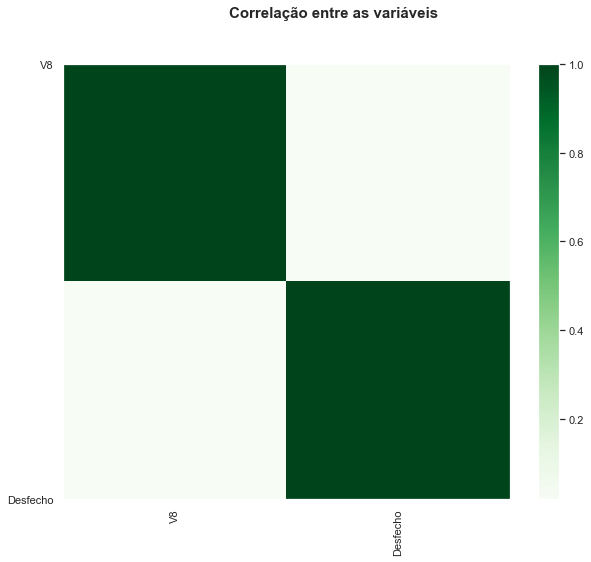

In [9]:
corr = train.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='Greens', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlação entre as variáveis', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

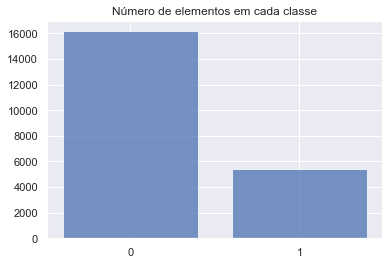

In [10]:
classes = train[train.columns[-1]]

cl = np.unique(classes)
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
    
numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl,  alpha=.75)
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

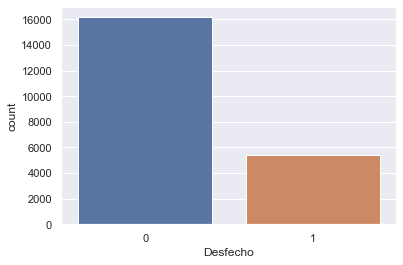

In [11]:
import seaborn as sns
sns.set()
sns.countplot(train['Desfecho'])

**Divisão dos dados em conjunto de dados em conjunto de teste e treino**

In [12]:
train = train.to_numpy()
nrow,ncol = train.shape
y = train[:,-1]
X = train[:,0:ncol-1]

# divide o conjunto em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Normalização dos dados**

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)

X = scaler.transform(X)
X_test = scaler.transform(X_test)

print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [0.]
Desvio Padrao: [1.]


**Determinação do número de componente por meio do PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.figure(figsize=(8,5))
ncomp = np.arange(1, np.shape(X)[1]+1)
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

**Classificação de dados**

KNeighbors

k: 1 accurace: 0.7075059757934643
k: 2 accurace: 0.7545334485034761
k: 3 accurace: 0.7812994997548607
k: 4 accurace: 0.7853558747343486
k: 5 accurace: 0.8077164163427506
k: 6 accurace: 0.7883687048627506
k: 7 accurace: 0.8064996464692733
k: 8 accurace: 0.8126997566057559
k: 9 accurace: 0.8066735426463427
k: 10 accurace: 0.7956108833100275
k: 11 accurace: 0.8027345190623029
k: 12 accurace: 0.8125838817505995
k: 13 accurace: 0.8036615179035544
k: 14 accurace: 0.8115410080541917
k: 15 accurace: 0.8062679806532953
k: 16 accurace: 0.8139157210936198
k: 17 accurace: 0.813973658521198
k: 18 accurace: 0.8149006573624493
k: 19 accurace: 0.8138577836660416
Melhor k: 18


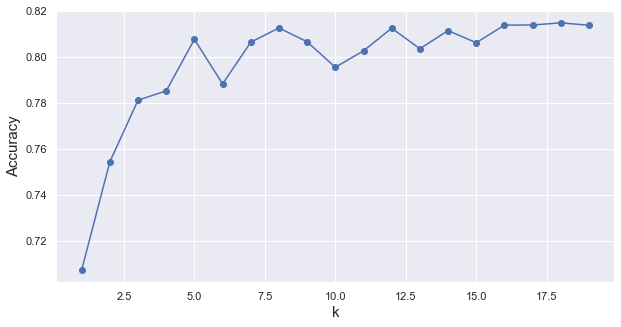

In [14]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
random.seed(42) # define the seed (important to reproduce the results)

nkf = 5 #número de folds
vk = []
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv = cross_validate(model, X_train, y_train, cv=nkf)
    print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean())
    vk.append(k)

best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)
plt.figure(figsize=(10,5))
plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

Acurácia da amostra obtida pelo melhor K

In [15]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.7555607043558851


Árvore de Decisão

In [16]:
from sklearn import tree
from sklearn.metrics import accuracy_score
np.random.seed(42) # define the seed (important to reproduce the results)
model = tree.DecisionTreeClassifier(criterion = 'entropy',random_state = 101)
model.fit(X_train,y_train)
y_pred = model.predict(X_test) 

score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.7504633920296571


Gaussian Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
np.random.seed(42) # define the seed (important to reproduce the results)
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy: ', model.score(X_test, y_test))

Accuracy:  0.7555607043558851


SVM com melhor valor de C por validação cruzada

c: 1 accurace: 0.749608957554265
c: 2 accurace: 0.7502462558881966
c: 3 accurace: 0.7501883453021415
c: 4 accurace: 0.7501883453021415
c: 5 accurace: 0.7501883453021415
c: 6 accurace: 0.7501883453021415
c: 7 accurace: 0.7501883453021415
c: 8 accurace: 0.7501883453021415
c: 9 accurace: 0.7501883453021415
c: 10 accurace: 0.7501883453021415
c: 11 accurace: 0.7501883453021415
c: 12 accurace: 0.750072443586796
c: 13 accurace: 0.750072443586796
c: 14 accurace: 0.7498407609849558
c: 15 accurace: 0.7498407609849558
c: 16 accurace: 0.7498986916998208
c: 17 accurace: 0.7498986916998208
c: 18 accurace: 0.7498986916998208
c: 19 accurace: 0.7498986916998208
Melhor C: 2


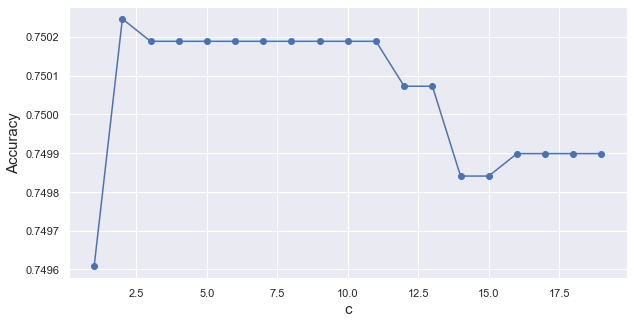

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
nkf = 6
vk = []
vscore = []
for c in range(1, 20):
    model = SVC(C = c, gamma = 'auto')
    cv = cross_validate(model, X_train, y_train, cv=nkf)
    print('c:', c, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean())
    vk.append(c)

best_c = np.argmax(vscore)+1
print('Melhor C:', best_c)
plt.figure(figsize=(10,5))
plt.plot(vk, vscore, '-bo')
plt.xlabel('c', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

Acurácia da amostra com o melhor C

In [20]:
from sklearn.metrics import accuracy_score
model = SVC(C = best_c, gamma = 'auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.7555607043558851


Random Forest

Number of Estimators: 1 Accuracy: 0.5
Number of Estimators: 11 Accuracy: 0.5
Number of Estimators: 21 Accuracy: 0.5
Number of Estimators: 31 Accuracy: 0.5
Number of Estimators: 41 Accuracy: 0.5
Number of Estimators: 51 Accuracy: 0.5
Number of Estimators: 61 Accuracy: 0.5
Number of Estimators: 71 Accuracy: 0.5
Number of Estimators: 81 Accuracy: 0.5
Number of Estimators: 91 Accuracy: 0.5
Melhor n: 1  com acurácia: 0.5


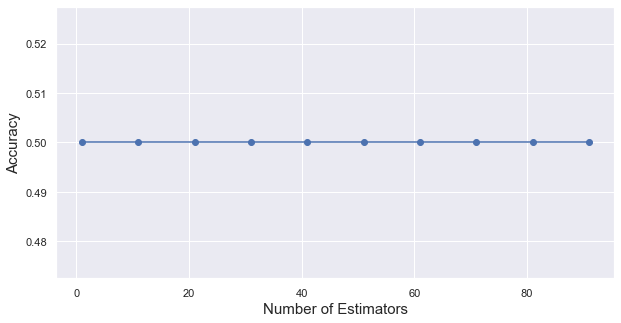

In [21]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42) # define the seed (important to reproduce the results)
# define os parâmetros do modelo
vscore = []
vn = []
for n in range(1,100,10):
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    score = precision_score(y_pred, y_test, average='macro')
    print('Number of Estimators:', n, 'Accuracy:', score)
    vscore.append(score)
    vn.append(n)
best_n = vn[np.argmax(vscore)]
print('Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

Ordenação dos atributos Random Forest

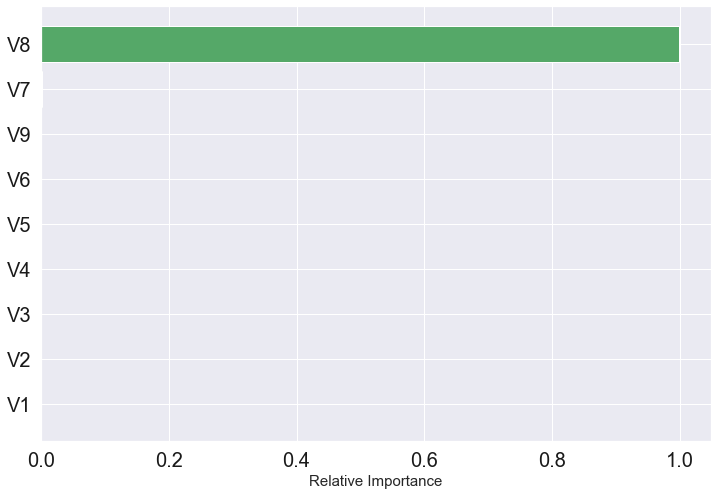

In [23]:
import random
random.seed(42)
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
train = pd.read_excel('AP_BD2.xlsx', header=(0))
importances = model.feature_importances_
indices = np.argsort(importances)

features_names = train.columns
lmeas_order = []
for i in indices:
    lmeas_order.append(features_names[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()

**Regressão Linear**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
np.random.seed(42) # define the seed (important to reproduce the results)
data = pd.read_excel('AP_BD2.xlsx', header=(0))
data = data.dropna(axis='rows') #remove NaN
dataf = data[['V1','V2','V3','V4','V5','V6','V7','V8','V9','Desfecho']]
dataf = dataf.drop(["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V9"], axis = 1)
print(dataf.head(10))
dataf = dataf.to_numpy()
nrow,ncol = dataf.shape
y = dataf[:,-1]
X = dataf[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)


     V8  Desfecho
0  0.07         1
1  0.07         1
2  0.06         1
3  0.06         1
4  0.05         1
5  0.08         1
6  0.07         1
7  0.04         1
8  0.07         1
9  0.06         1


**Cálculo do erro quadrático médio para a regressão linear**

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# modelo de regressão linear 
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
print("MSE:", MSE)          # Calculate the test MSE

MSE: 0.18488497003050905


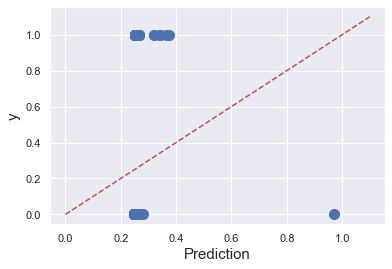

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)
# salva a figura em um arquivo
#fig.savefig('regression-LR.jpg')

**Cálculo do R2 para a Regressão Linear**

In [17]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: -0.0010625642681170167


**Cálculo do erro quadratíco médio para o método Ridge**

In [18]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# ajusta o modelo ridge regression
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = ridge2.predict(x_test)           # Use this model to predict the test data
MSE = mean_squared_error(y_test, y_pred)
print("MSE:", MSE)          # Calculate the test MSE

MSE: 0.18488497003050905


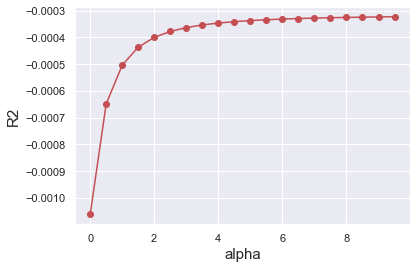

In [19]:
vR2 = []
valpha = []
# variamos os valaores de alpha
for alpha in np.arange(0,10,0.5):
    ridge2 = Ridge(alpha = alpha, normalize = True)
    ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = ridge2.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

**Cálculo do erro quadratíco médio para o método Lassso**

In [20]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = 0.1
lasso = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = lasso.predict(x_test)           # Use this model to predict the test data
MSE = mean_squared_error(y_test, y_pred)         # Calculate the test MSE
print('MSE:', MSE)

MSE: 0.1847469714837861


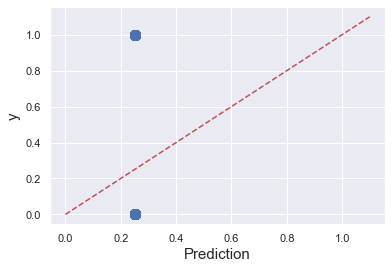

In [21]:
fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)
# salva a figura em um arquivo
fig.savefig('regression-Lasso.jpg')

**Cálculo de R2 para o método Lasso**

In [22]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print("R2:", R2)  

R2: -0.00031536897676942566


**Pré-processamento dos dados do arquivo 'AP_BD2.xlsx' não considerando outras variaveis além V8**

In [23]:
train = pd.read_excel('AP_BD2.xlsx', header=(0)) 
train.drop(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9'], axis=1, inplace=True) 

train.isnull().sum().sort_values(ascending=False).head(10)
# remove as linhas com NaN
train=train.dropna() 
print("Número de linhas e colunas:",train.shape)
train.head(10)

Número de linhas e colunas: (21578, 2)


,V8,Desfecho
0,0.07,1
1,0.07,1
2,0.06,1
3,0.06,1
4,0.05,1
5,0.08,1
6,0.07,1
7,0.04,1
8,0.07,1
9,0.06,1


In [24]:
train = train.to_numpy()
nrow,ncol = train.shape
y = train[:,-1]
X = train[:,0:ncol-1]

In [25]:
# divide o conjunto em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k: 1 accurace: 0.6521875604362267
k: 2 accurace: 0.7756933893875547
k: 3 accurace: 0.7931891922515769
k: 4 accurace: 0.7913338587856411
k: 5 accurace: 0.8110881325684599
k: 6 accurace: 0.7985748760548149
k: 7 accurace: 0.7976465147239303
k: 8 accurace: 0.799674754470857
k: 9 accurace: 0.8001390461876995
k: 10 accurace: 0.8026291806433578
k: 11 accurace: 0.8066273466810049
k: 12 accurace: 0.7984589340678521
k: 13 accurace: 0.8018768462448883
k: 14 accurace: 0.7952148140354108
k: 15 accurace: 0.8085380933887868
k: 16 accurace: 0.7992691387527636
k: 17 accurace: 0.8085960241036517
k: 18 accurace: 0.8084221917014368
k: 19 accurace: 0.8098704998306823
Melhor k: 5


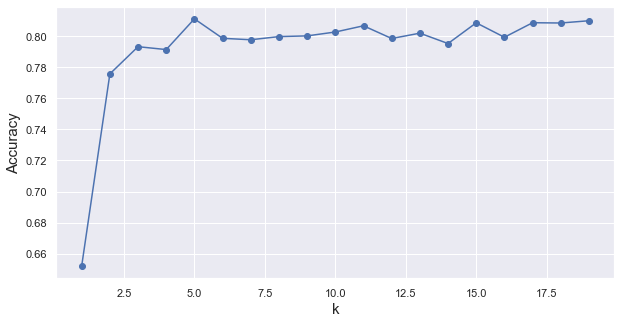

In [26]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
random.seed(42) # define the seed (important to reproduce the results)

nkf = 6
vk = []
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv = cross_validate(model, X_train, y_train, cv=nkf)
    print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean())
    vk.append(k)

best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)
plt.figure(figsize=(10,5))
plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

In [27]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.7914735866543096


**Conclusão**